In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv('delivery_time.csv')
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [7]:
data1=data.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
data1

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


Data Visualisation

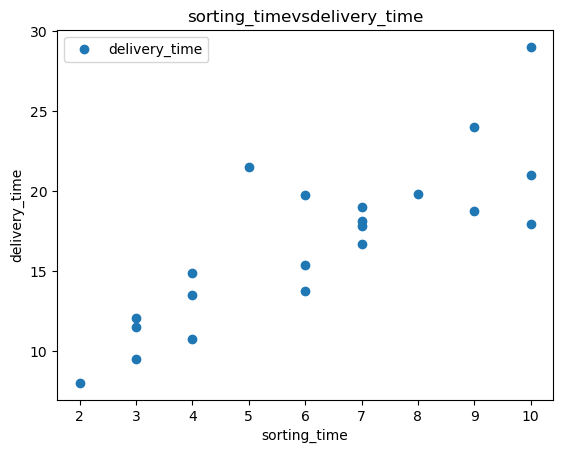

In [8]:
data1.plot(x='sorting_time',y='delivery_time',style='o')
plt.title('sorting_timevsdelivery_time')
plt.xlabel('sorting_time')
plt.ylabel('delivery_time')
plt.show()

In [9]:
from scipy.stats import pearsonr
corr,_= pearsonr(data1['delivery_time'],data1['sorting_time'])
print('pearsons correlation:%.3f'% corr)
from scipy.stats import spearmanr
corr,_=spearmanr(data1['delivery_time'],data1['sorting_time'])
print('Spearmans correlation:%.3f'% corr)

pearsons correlation:0.826
Spearmans correlation:0.806


C:\Users\Santosh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


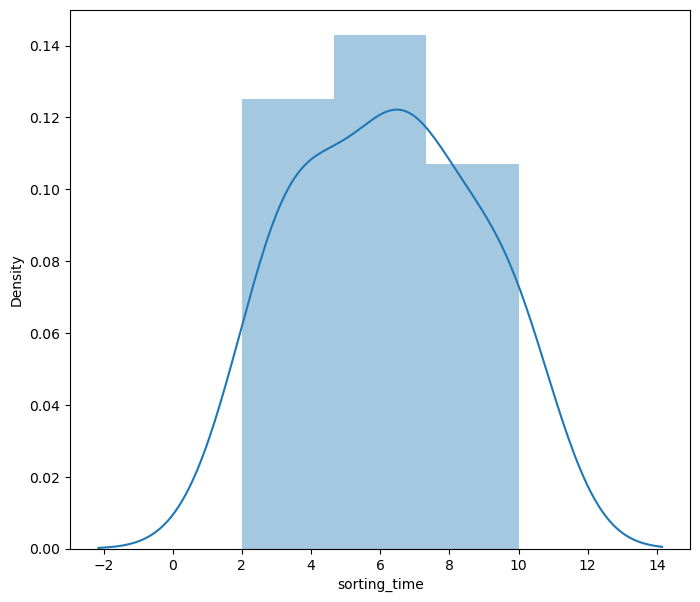

In [10]:
import seaborn as sns
plt.figure(figsize=(8,7))
plt.tight_layout()
sns.distplot(data1['sorting_time'])
plt.show()

C:\Users\Santosh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


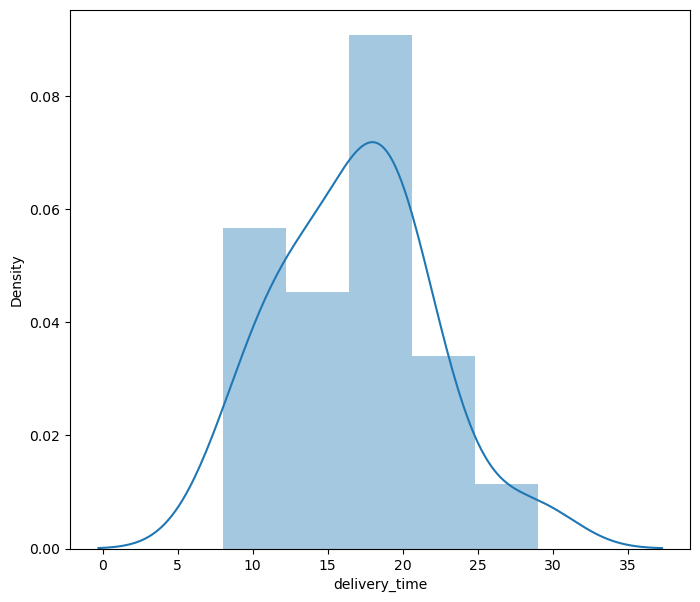

In [11]:
plt.figure(figsize=(8,7))
plt.tight_layout()
sns.distplot(data1['delivery_time'])
plt.show()

In [12]:
X=data1['sorting_time'].values.reshape(-1,1)
print(X)
y=data1['delivery_time'].values.reshape(-1,1)

[[10]
 [ 4]
 [ 6]
 [ 9]
 [10]
 [ 6]
 [ 7]
 [ 3]
 [10]
 [ 9]
 [ 8]
 [ 4]
 [ 7]
 [ 3]
 [ 3]
 [ 4]
 [ 6]
 [ 7]
 [ 2]
 [ 7]
 [ 5]]


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
predict_reg = LinearRegression()

Train the model using linear regression

In [16]:
predict_reg.fit(X_train,y_train)

LinearRegression()

In [17]:
print('intercept value of model is ',predict_reg.intercept_)
print('coefficient value of model is',predict_reg.coef_)


intercept value of model is  [4.68229796]
coefficient value of model is [[2.02424455]]


In [18]:
y_pred = predict_reg.predict(X_test)

In [19]:
pmsh_pf = pd.DataFrame({'Actual':y_test.flatten(),'predict':y_pred.flatten()})
pmsh_pf

,Actual,predict
0,21.00,24.924743
1,18.11,18.852010
2,14.88,12.779276
3,13.50,12.779276
4,17.90,24.924743


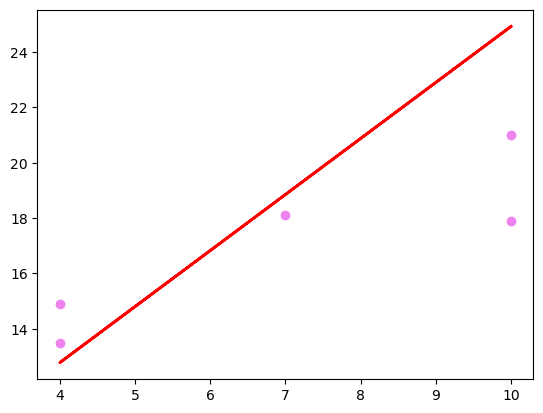

In [20]:
plt.scatter(X_test,y_test,color = 'violet')
plt.plot(X_test,y_pred,color = 'red',linewidth=2)
plt.show()

In [21]:
print('Mean Absolute Error :',metrics.mean_absolute_error(y_test,y_pred))
print('Mean squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root mean squared error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R^2 score:',metrics.r2_score(y_test,y_pred))

Mean Absolute Error : 2.9025888966971176
Mean squared Error: 14.046738956635016
Root mean squared error: 3.7478979383962705
R^2 score: -1.0207599586367362


Logirthem Transformation

y=a+b*log(x)

In [22]:
#input data set

X_log = np.log(data1['sorting_time'].values.reshape(-1,1))

#output or predicted value of data
y_log = data1['delivery_time'].values.reshape(-1,1)

In [23]:
X_train_log,X_test_log,y_train_log,y_test_log = train_test_split(X_log,y_log,test_size=0.2,random_state=42)

In [24]:
y_pred_log = LinearRegression()
y_pred_log.fit(X_train_log,y_train_log)

LinearRegression()

In [25]:
print("intercept value of model is ",y_pred_log.intercept_)
print("coefficient value of model is",y_pred_log.coef_)

intercept value of model is  [-0.31865575]
coefficient value of model is [[10.09551654]]


In [26]:
log_model = y_pred_log.predict(X_test_log)
log_model

array([[22.92713014],
       [19.32631235],
       [13.6767019 ],
       [13.6767019 ],
       [22.92713014]])

In [27]:
pmsh_pf_1 = pd.DataFrame({'Actual':y_test_log.flatten(),'Predict':log_model.flatten()})
pmsh_pf_1

,Actual,Predict
0,21.00,22.927130
1,18.11,19.326312
2,14.88,13.676702
3,13.50,13.676702
4,17.90,22.927130


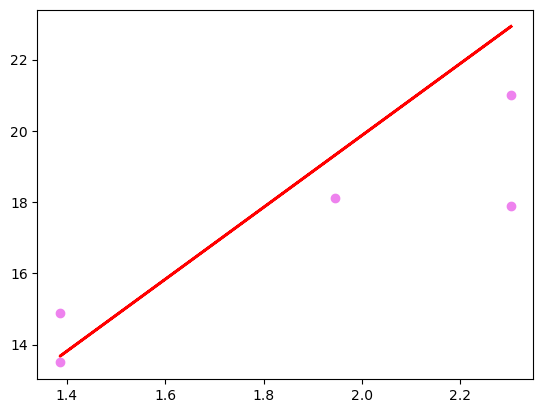

In [28]:
plt.scatter(X_test_log,y_test_log,color = 'violet')
plt.plot(X_test_log,log_model,color='red',linewidth=2)
plt.show()

calculate error rate of logrithm transformation model

In [29]:
print('mean absolute error:',metrics.mean_absolute_error(y_test_log,log_model))
print('mean squared error:',metrics.mean_squared_error(y_test_log,log_model))
print('root mean squared error:',np.sqrt(metrics.mean_squared_error(y_test_log,log_model)))
print('R^2 score:',metrics.r2_score(y_test_log,log_model))

mean absolute error: 1.910114526185978
mean squared error: 6.388886730349971
root mean squared error: 2.5276247210276233
R^2 score: 0.08089653229737481


Exponential transformation model

log(y) = α+β×+Ɛ

In [50]:
#input dataset

X_elog = data1[''].values.reshape(-1,1)

#output
y_elog = np.log(data['Salary'].values.reshape(-1,1))

In [52]:
X_train_exp,X_test_exp,y_train_exp,y_test_exp = train_test_split(X_elog,y_elog,test_size=0.2,random_state=42)

In [54]:
exp_model = LinearRegression()
exp_model.fit(X_train_exp,y_train_exp)


LinearRegression()

In [56]:
print('exponential intercept value of model',exp_model.intercept_)
print('expenential coefficient value of model',exp_model.coef_)

exponential intercept value of model [10.48525073]
expenential coefficient value of model [[0.12704681]]


In [57]:
exp_model_pred = exp_model.predict(X_test_exp)
exp_model_pred

array([[11.70490014],
       [11.10778012],
       [11.5270346 ],
       [11.15859884],
       [10.89180053],
       [10.95532394]])

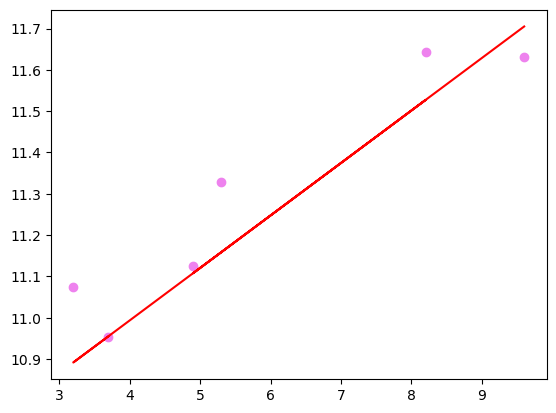

In [58]:
plt.scatter(X_test_exp,y_test_exp,color = 'violet')
plt.plot(X_test_exp,exp_model_pred,color='red')
plt.show()

In [60]:
print('mean absolute error:',metrics.mean_absolute_error(y_test_exp,exp_model_pred))
print('mean squared error:',metrics.mean_squared_error(y_test_exp,exp_model_pred))
print('root mean squared error:',np.sqrt(metrics.mean_squared_error(y_test_exp,exp_model_pred)))
print('R^2 Score:',metrics.r2_score(y_test_exp,exp_model_pred))

mean absolute error: 0.09314373254401727
mean squared error: 0.013430075287585596
root mean squared error: 0.11588820167551828
R^2 Score: 0.8120949075482874
